In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных напрямую с URL
url = 'https://archive.ics.uci.edu/static/public/352/data.csv'
df = pd.read_csv(url, encoding='latin1')

# Проверим первые несколько строк, чтобы удостовериться, что данные загружены корректно
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 1. Предобработка данных

In [30]:
# Для начала положим отдельно все отмененный транзакции, и пока 
df_bad = df[df['InvoiceNo'].str.startswith('C')].reset_index(drop=True)
df = df[~df['InvoiceNo'].str.startswith('C')].reset_index(drop=True)
print(len(df_bad))
print(len(df))

9288
532621


In [31]:
# Посмотрим какие у нас вообще типы есть
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532621 entries, 0 to 532620
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    532621 non-null  object 
 1   StockCode    532621 non-null  object 
 2   Description  531167 non-null  object 
 3   Quantity     532621 non-null  int64  
 4   InvoiceDate  532621 non-null  object 
 5   UnitPrice    532621 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      532621 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.5+ MB


In [32]:
# Преобразуем типы в более удобные к работе
df = df.convert_dtypes()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532621 entries, 0 to 532620
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    532621 non-null  string        
 1   StockCode    532621 non-null  string        
 2   Description  531167 non-null  string        
 3   Quantity     532621 non-null  Int64         
 4   InvoiceDate  532621 non-null  datetime64[ns]
 5   UnitPrice    532621 non-null  Float64       
 6   CustomerID   397924 non-null  Int64         
 7   Country      532621 non-null  string        
dtypes: Float64(1), Int64(2), datetime64[ns](1), string(4)
memory usage: 34.0 MB
None


In [33]:
# Посмотрим количество пропушенных значений
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134697
Country             0
dtype: int64

In [34]:
# Посмторим, строки с пропусками
df[df[['CustomerID']].isna().sum(axis=1) > 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
613,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,<NA>,United Kingdom
1431,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,<NA>,United Kingdom
1432,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,<NA>,United Kingdom
1433,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,<NA>,United Kingdom
1434,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,<NA>,United Kingdom


У нас огромное количество пропущенных значений в 'CustomerID', посмотрим может хоть в одной строке из заказа содержится нужное ID

In [35]:
print(df[df[['CustomerID']].isna().sum(axis=1) > 0]['CustomerID'].unique())

<IntegerArray>
[<NA>]
Length: 1, dtype: Int64


In [36]:
# Нечто аналогичное попробуем и с 'Description',может где-то есть ненулевые цены
print(df[df[['Description']].isna().sum(axis=1) > 0]['UnitPrice'].sum())

0.0


In [37]:
# Везде нулевые цены, для 'CustomerID' мы не смогли ничего найти, тогда удалим данные строки
df = df[df.isna().sum(axis=1) == 0].reset_index(drop=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [38]:
# помня также что у нас данные с 01/12/2010 по 09/12/2011, удалим все записи для 2011-12,
# т.к данные не для всего месяца и будут мешать анализу
df = df[~((df['InvoiceDate'].dt.year == 2011) & (df['InvoiceDate'].dt.month == 12))]

# также добавим столбец прибыль
df['Revenue'] = df['UnitPrice']*df['Quantity']

In [39]:
# Посмотрим основные стат. характеристики
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
count,380620.0,380620,380620.0,380620.0,380620.0
mean,12.858712,2011-07-04 06:40:28.370342912,3.133906,15293.418667,22.05143
min,1.0,2010-12-01 08:26:00,0.0,12346.0,0.0
25%,2.0,2011-04-01 13:00:00,1.25,13969.0,4.95
50%,6.0,2011-07-21 11:55:00,1.95,15159.0,11.9
75%,12.0,2011-10-12 14:56:00,3.75,16793.0,19.8
max,74215.0,2011-11-30 17:37:00,8142.75,18287.0,77183.6
std,129.332657,NaN,22.429608,1712.623349,158.217806


Вывод по Предобработке данных: <br>
Итак, почистили данные. В стат. характеристиках тоже не замечено никаких проблем(отрицательных цен, отрицательного количества) <br>
Перейдем к дальнейшему анализу

### 2. Создание когорт. Расчет Retention, Churn Rate

Будет разбивать пользователь на когорты по дате первого заказа

In [40]:
# Добавки колонку Месяц в наши данные
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Определим месяц первой покупки для каждого клиента
Cohort = df.groupby('CustomerID').agg(CohortMonth=('InvoiceMonth','min'))

# Примержим столбец к нашему df
df = df.merge(Cohort,how='inner',on='CustomerID')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.0,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12


In [41]:
# Посмотрим наши получившиеся когорты
print(df['CohortMonth'].unique())

# Посчитаем количество месяцев, относительно первого, для всех покупок
df['Period'] = (df['InvoiceMonth'].dt.year - df['CohortMonth'].dt.year) * 12 + (df['InvoiceMonth'].dt.month - df['CohortMonth'].dt.month)
df.head()

<PeriodArray>
['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
 '2011-07', '2011-08', '2011-09', '2011-10', '2011-11']
Length: 12, dtype: period[M]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,CohortMonth,Period
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,2010-12,2010-12,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.0,2010-12,2010-12,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12,0


In [42]:
# Сгруппируем все покупки по пользователей по месяцам, опустим ненужные колонки
df = df.groupby(['CustomerID','Country','CohortMonth','Period']).agg({'Revenue':'sum'}).reset_index()
df.head()

,CustomerID,Country,CohortMonth,Period,Revenue
0,12346,United Kingdom,2011-01,0,77183.6
1,12347,Iceland,2010-12,0,711.79
2,12347,Iceland,2010-12,1,475.39
3,12347,Iceland,2010-12,4,636.25
4,12347,Iceland,2010-12,6,382.52


In [43]:
# Посмотрим также отдельно основные стат. характеристики покогортно
df.groupby('CohortMonth')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
CohortMonth,,,,,,,,
2010-12,4580.0,944.616832,2753.961134,2.42,247.5975,392.17,747.85,75412.64
2011-01,1587.0,692.764626,2492.857064,0.85,204.275,341.0,592.79,77183.6
2011-02,1239.0,470.764052,523.934904,3.75,190.815,315.69,536.02,7325.84
2011-03,1252.0,503.906486,600.348047,2.1,210.585,342.29,614.185,11955.2
2011-04,759.0,421.964336,368.438892,3.25,187.13,318.3,519.35,4041.8
2011-05,636.0,434.424292,542.846356,2.9,185.78,312.655,502.435,9864.26
2011-06,523.0,507.127878,1804.522581,5.9,155.19,305.2,525.0,39916.5
2011-07,354.0,390.949664,344.199221,4.25,159.325,303.51,511.67,2739.8
2011-08,287.0,629.842125,2085.292078,10.5,169.425,305.75,509.745,27827.78


Заметим, что у нас имеются сильно большие значения, по совершенны покупкам у отдельных юзеров. Рассмотрим это подробнее.

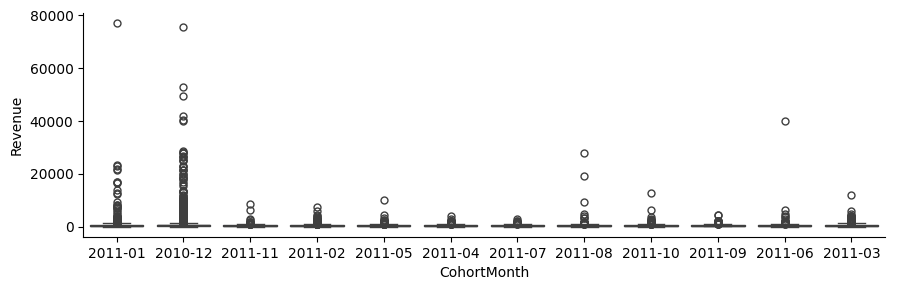

In [44]:
sns.catplot(kind="box", data=df, x="CohortMonth", y="Revenue", height=3, aspect=3)

Предварительные наблюдения
1) Заметим, огромное количество покупателей с крупными заказами в январской и декабрьских когортах

Итак, когорты созданы. Далее посчитаем Retention n-ого месяца, Retention после n-ого месяца, Churn Rate после n-ого месяца. Покогортно

#### 2.1 Retention n-ого Месяца

In [45]:
# Построим сводную таблицу, где считаем количество людей помесячно
retention = df.pivot_table(index='CohortMonth', columns='Period', values='CustomerID', aggfunc='nunique')
retention.fillna(0,inplace=True)
retention = retention.astype('int')
print(retention)

# Переделаем количество пользователей в процентаx
retention = retention.apply(lambda x: round(100*x/x[0],2), axis=1)

Period        0    1    2    3    4    5    6    7    8    9    10   11
CohortMonth                                                            
2010-12      885  324  286  340  321  352  321  309  313  350  331  445
2011-01      417   92  111   96  134  120  103  101  125  136  152    0
2011-02      380   71   71  108  103   94   96  106   94  116    0    0
2011-03      452   68  114   90  101   76  121  104  126    0    0    0
2011-04      300   64   61   63   59   68   65   78    0    0    0    0
2011-05      284   54   49   49   59   66   75    0    0    0    0    0
2011-06      242   42   38   64   56   81    0    0    0    0    0    0
2011-07      188   34   39   42   51    0    0    0    0    0    0    0
2011-08      169   35   42   41    0    0    0    0    0    0    0    0
2011-09      299   70   90    0    0    0    0    0    0    0    0    0
2011-10      358   86    0    0    0    0    0    0    0    0    0    0
2011-11      324    0    0    0    0    0    0    0    0    0   

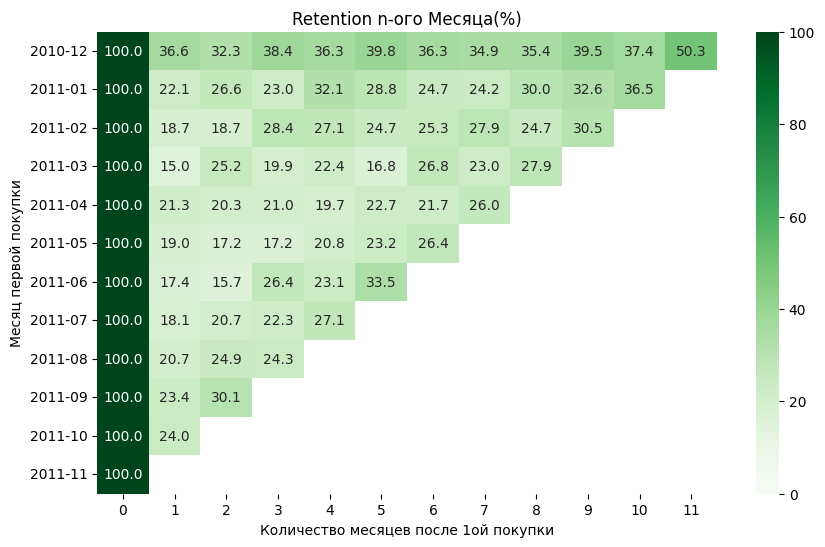

In [46]:
# Визуализация
plt.figure(figsize=(10, 6))
sns.heatmap(retention.replace(0, np.nan), annot=True, fmt='.1f', vmin=0, vmax=100, cmap='Greens')
plt.title('Retention n-ого Месяца(%)')
plt.xlabel('Количество месяцев после 1ой покупки')
plt.ylabel('Месяц первой покупки')
plt.show()

Предварительные наблюдения:
1) У всех когорт наблюдаются сильные просадки после первого месяца
2) Дальньшая просадка не наблюдается, удержание выходит на плато. Т.к. большинтсво клиентов интернет-магазина оптовики, следует изучить подробнее
   их возвращение на всех месяцах после n-ого.
3) В ноябре виден всплеск удержания, возможно влияние черной пятницы или предновогодние закупки, необходимо также далее внимательнее изучить
4) Когорта 2010-12 имеет самое высокое удержания, далее также нужно внимательнее изучить

#### 2.2 Retention после N месяцев

Теперь также изучим момент, когда люди могли возвращаться не только в первый месяц, но и во все прочие

In [47]:
def func(df):
    max_month = df['Period'].max()-df['Period'].min()+1
    retention_n = []
    
    for j in df['CohortMonth'].unique():
        df1 = df[df['CohortMonth']==j][['CustomerID','Period']].drop_duplicates()
        tmp = []
        for i in range(max_month):
            tmp.append(df1[df1['Period']>=i]['CustomerID'].nunique())
        retention_n.append(tmp)
    df_new = pd.DataFrame(data=retention_n, index=df['CohortMonth'].unique())
    return df_new
    

In [48]:
# Строим табличку, где считаем людей который пользовались в текущем месяц или позже
retention_after_n = func(df)
retention_after_n = retention_after_n.sort_index()
print(retention_after_n)

# Переделаем количество пользователей в процентаx
retention_after_n = retention_after_n.apply(lambda x: round(100*x/x[0],2), axis=1)

          0    1    2    3    4    5    6    7    8    9    10   11
2010-12  885  761  748  733  716  701  683  658  632  594  547  445
2011-01  417  333  328  322  314  297  283  274  255  222  152    0
2011-02  380  287  275  268  259  247  233  212  172  116    0    0
2011-03  452  313  306  288  273  252  237  185  126    0    0    0
2011-04  300  192  183  170  158  138  112   78    0    0    0    0
2011-05  284  182  166  154  141  115   75    0    0    0    0    0
2011-06  242  146  135  127  108   81    0    0    0    0    0    0
2011-07  188   98   86   71   51    0    0    0    0    0    0    0
2011-08  169   81   67   41    0    0    0    0    0    0    0    0
2011-09  299  126   90    0    0    0    0    0    0    0    0    0
2011-10  358   86    0    0    0    0    0    0    0    0    0    0
2011-11  324    0    0    0    0    0    0    0    0    0    0    0


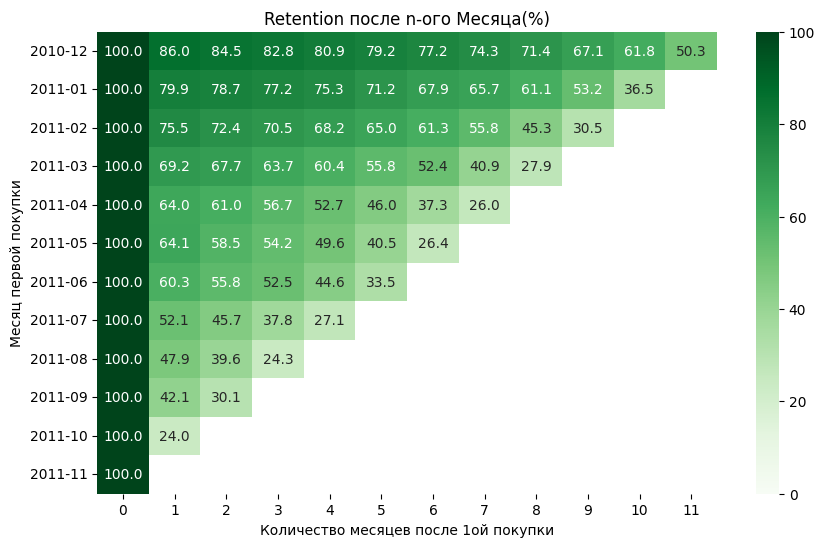

In [49]:
# Визуализация
plt.figure(figsize=(10, 6))
sns.heatmap(retention_after_n.replace(0, np.nan), annot=True, fmt='.1f', vmin=0, vmax=100, cmap='Greens')
plt.title('Retention после n-ого Месяца(%)')
plt.xlabel('Количество месяцев после 1ой покупки')
plt.ylabel('Месяц первой покупки')
plt.show()

Предварительные наблюдения:
1) Естественное снижение удержания – в каждой когорте заметен спад со временем, что ожидаемо
2) Оптовая специфика – оптовые клиенты совершают закупки нерегулярно, поэтому отсутствие покупки в течение длительного периода не означает потерю клиента
3) Долгосрочная лояльность – чем дольше клиент остаётся с компанией, тем выше вероятность его возврата, что подтверждает гипотезу о цикличности закупок
4) Следующий шаг – проанализировать время до второй покупки и распределение интервалов между заказами для более точной оценки удержания

#### 2.3 Сhurn Rate после n-ого месяца

In [50]:
# Вычтем из 100% renention после n-ого месяца и получим необходимый Churn Rate
ChurnRate_after_n = 100 - retention_after_n

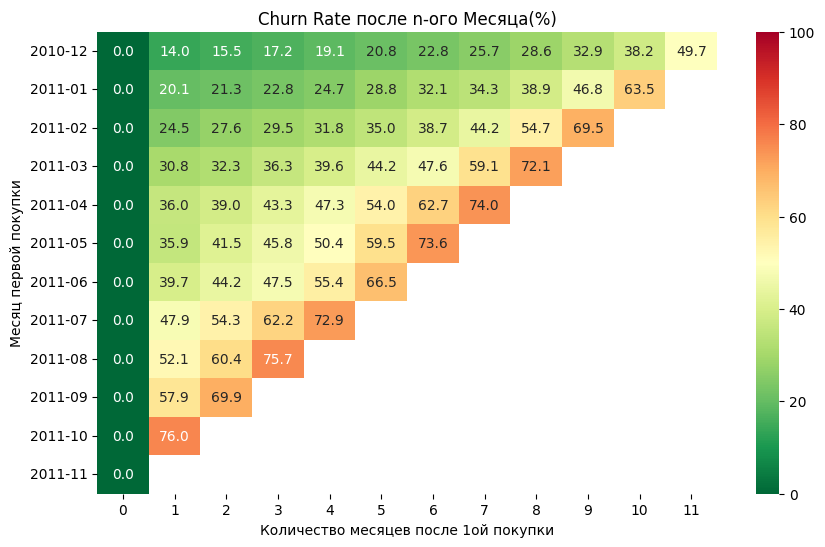

In [51]:
# Визуализация
plt.figure(figsize=(10, 6))
sns.heatmap(ChurnRate_after_n.replace(100, np.nan), annot=True, fmt='.1f', vmin=0, vmax=100, cmap='RdYlGn_r')
plt.title('Churn Rate после n-ого Месяца(%)')
plt.xlabel('Количество месяцев после 1ой покупки')
plt.ylabel('Месяц первой покупки')
plt.show()

### 3. LTV (Lifetime Value)

In [52]:
df.head()

,CustomerID,Country,CohortMonth,Period,Revenue
0,12346,United Kingdom,2011-01,0,77183.6
1,12347,Iceland,2010-12,0,711.79
2,12347,Iceland,2010-12,1,475.39
3,12347,Iceland,2010-12,4,636.25
4,12347,Iceland,2010-12,6,382.52


In [53]:
# Посчитаем в когортах количество людей, прибыль за месяц, среднюю прибыль на человека
cohort_data = df.groupby(['CohortMonth','Period']).agg({'Revenue':'sum','CustomerID':'nunique'}).reset_index()

# ARPMU (Average Revenue Per Monthly User)
cohort_data['ARPMU'] = cohort_data['Revenue']/cohort_data['CustomerID']
cohort_data.head()

,CohortMonth,Period,Revenue,CustomerID,ARPMU
0,2010-12,0,572713.89,885,647.134339
1,2010-12,1,276237.69,324,852.585463
2,2010-12,2,233845.37,286,817.641154
3,2010-12,3,303119.39,340,891.527618
4,2010-12,4,204407.66,321,636.783988


In [54]:
# Развернем таблицу, оставим только нужные данные: CohortMonth, Period, ARPMU
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='Period', values='ARPMU')
cohort_pivot.head()

Period,0,1,2,3,4,5,6,7,8,9,10,11
CohortMonth,,,,,,,,,,,,
2010-12,647.134339,852.585463,817.641154,891.527618,636.783988,956.328125,978.69972,1005.773204,1059.901661,1350.896114,1377.887039,1154.614809
2011-01,703.135132,599.455543,569.983514,745.702083,605.32903,704.864833,680.654369,719.700099,576.189208,822.0875,815.013816,<NA>
2011-02,416.163342,409.059718,579.357465,446.656111,389.785534,364.076915,517.777396,589.158774,589.149574,558.702155,<NA>,<NA>
2011-03,442.632655,442.050441,518.048333,475.740111,511.458713,526.589605,536.524711,682.922596,565.601825,<NA>,<NA>,<NA>
2011-04,406.70497,460.200312,411.099508,385.896349,446.00322,444.210294,441.061231,438.828333,<NA>,<NA>,<NA>,<NA>


In [55]:
# Расчитаем прибыль на 1 человека за месяц, с учетом ушедших
cohort_pivot = (cohort_pivot * retention_after_n / 100)
cohort_ltv = cohort_pivot.sum(axis=1)
print(cohort_ltv)

CohortMonth
2010-12    8681.334182
2011-01     5185.82468
2011-02    3045.175159
2011-03    2723.617587
2011-04    1888.681487
2011-05    1665.721343
2011-06    1625.407392
2011-07    1018.249636
2011-08    1357.647981
2011-09     816.295379
2011-10     599.845057
2011-11     421.580617
Freq: M, dtype: Float64


In [56]:
cohort_pivot.fillna(0, inplace=True)
print(cohort_pivot.info())

# Преобразуем явно во float, а то sns.heatmap почему-то ругается, на 'Float64'
cohort_pivot = cohort_pivot.astype(float)
cohort_pivot.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 12 entries, 2010-12 to 2011-11
Freq: M
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     Float64
 1   1       12 non-null     Float64
 2   2       12 non-null     Float64
 3   3       12 non-null     Float64
 4   4       12 non-null     Float64
 5   5       12 non-null     Float64
 6   6       12 non-null     Float64
 7   7       12 non-null     Float64
 8   8       12 non-null     Float64
 9   9       12 non-null     Float64
 10  10      12 non-null     Float64
 11  11      12 non-null     Float64
dtypes: Float64(12)
memory usage: 1.4 KB
None
<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 12 entries, 2010-12 to 2011-11
Freq: M
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
 2   2       12 non-null     float64
 3   

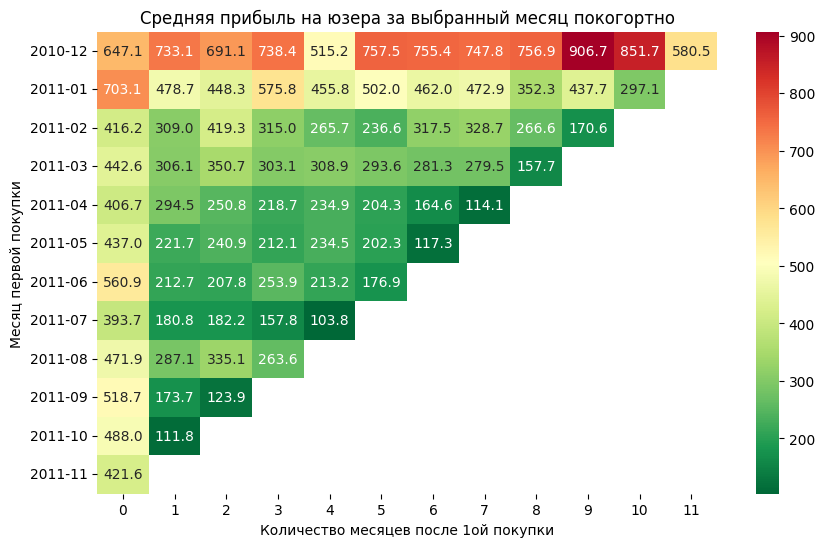

In [57]:
# Визуализация
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_pivot.replace(0,np.nan), annot=True, fmt='.1f', cmap='RdYlGn_r')
plt.title('Средняя прибыль на юзера за выбранный месяц покогортно')
plt.xlabel('Количество месяцев после 1ой покупки')
plt.ylabel('Месяц первой покупки')
plt.show()


Предварительные наблюдения:
1) В когортах 2011-01, 2010-12 наблюдается более высокие прибыль на юзера со временем.
   Ранее мы наблюдали в данных когортах огромное количество топ юзеров.
2) В когорте 2010-12 наблюдается рост средней прибыль, возможно также связано с топ юзерами
3) Средняя прибыль на юзера в 1-ом месяце остальных когорт примерно одинакова, однако замечана тенденция спада этого же показателя
   уже во 2-ом и более поздних месяцах, также необходимо разобраться подробнее

In [66]:
# Рассчитываем разницу в LTV между текущим и предыдущим месяцем
ltv_change = cohort_ltv.diff().dropna()  # diff() считает разницу, dropna() удаляет первый NaN


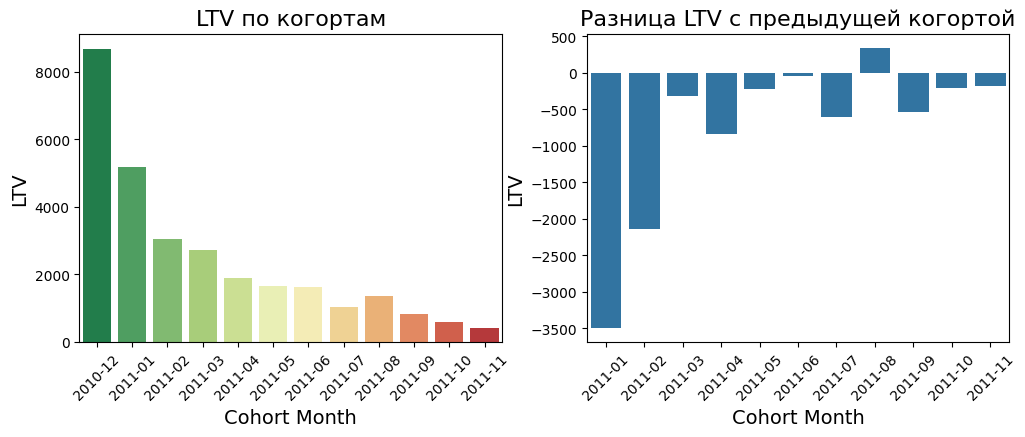

In [82]:
# Создаем график для LTV
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x=cohort_ltv.index, y=cohort_ltv.values, palette='RdYlGn_r', hue=cohort_ltv.index)

plt.title('LTV по когортам', fontsize=16)
plt.xlabel('Cohort Month', fontsize=14)
plt.ylabel('LTV', fontsize=14)
plt.xticks(rotation=45)

#################################################33
# Создаем график для изменения LTV
plt.subplot(1,2,2)
sns.barplot(x=ltv_change.index, y=ltv_change.values)

plt.title('Разница LTV с предыдущей когортой', fontsize=16)
plt.xlabel('Cohort Month', fontsize=14)
plt.ylabel('LTV', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Предварительные наблюдения:
1) В когортах 2011-01, 2010-12 наблюдается все также наблюдается аномально высокие LTV, подтверждая предущие данные
2) Начиная с когорты 2011-02 наблюдается относительная стабильность в падении LTV, что легко объясняется.

### 4. Разбор предварительных выводов

Вспомним все наши предварительный наблюдения и согласуем их вместе:

1. **`Влияние сезонных факторов на удержание и прибыль`** <br>
В январских и декабрьских когортах наблюдается значительное количество крупных заказов, что может быть связано с предновогодними закупками. Это явление влияет на удержание, которое после первого месяца демонстрирует просадку, но затем стабилизируется на плато.
Также в ноябре был зафиксирован всплеск удержания, что, вероятно, связано с сезонными пиковыми периодами покупок (Черная пятница). <br>
**Рекомендации для дальнейшего анализа:** <br>
Изучить поведение крупных клиентов, пришедних в эти месяцы, чтобы понять влияние сезонных факторов на долгосрочное удержание и прибыльность.
Оценить, как периодичность закупок влияет на удержание и LTV (Lifetime Value) в разных сезонах.

2. **`Цикличность покупок и долгосрочная лояльность клиентов`** <br>
Снижение удержания со временем — это ожидаемый процесс для всех когорт, однако для оптовых клиентов снижение может быть связано с их нерегулярными закупками. Чем дольше клиент остается с компанией, тем выше вероятность его возвращения, что подтверждает цикличность покупок у оптовиков. <br>
**Рекомендации для дальнейшего анализа:** <br>
Проанализировать интервалы между заказами для точной оценки цикличности закупок.
Изучить поведение клиентов с долгосрочной лояльностью, чтобы выявить общие закономерности, которые могут помочь в удержании клиентов.

3. **`Поведение и прибыльность клиентов в долгосрочной перспективе`** <br> 
В когортных группах 2010-12 и 2011-01 наблюдается аномально высокий LTV (Lifetime Value), что связано с присутствием крупных клиентов с большими заказами. Однако начиная с когорты 2011-02, наблюдается более стабильное снижение LTV, что может свидетельствовать о изменении и стабилизации состава клиентов. <br>
В когортах с высоким LTV (2010-12 и 2011-01) зафиксирован рост средней прибыли на пользователя, что подтверждает теорию о том, что топовые пользователи оказывают значительное влияние на эти показатели. <br>
**Рекомендации для дальнейшего анализа:** <br>
Проанализировать причины снижения LTV, количества прихода крупных клиентов в последующих месяцах, чтобы выявить возможные изменения в клиентской базе.
Разработать стратегии для увеличения LTV, направленные на активизацию клиентов, которые ранее показывали высокий потенциал.